In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utility import pick_vessel
import seaborn as sns
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

1. The features in the dataset are continuous. They are as follows:
    - Power consumed by different components
    - Factors influencing power consumption 
    - Time series in an interval of 5 minutes for 2 vessels, spanning across a year. That makes it $12*24*365 = 105120$ data points for each vessel.


In [66]:
# Read the data
df = pd.read_csv('data.csv', header = 0)
df.head()

,Start Time,End Time,Vessel Name,Power Galley 1 (MW),Power Galley 2 (MW),Power Service (MW),HVAC Chiller 1 Power (MW),HVAC Chiller 2 Power (MW),HVAC Chiller 3 Power (MW),Scrubber Power (MW),Sea Temperature (Celsius),Boiler 1 Fuel Flow Rate (L/h),Boiler 2 Fuel Flow Rate (L/h),Incinerator 1 Fuel Flow Rate (L/h),Diesel Generator 1 Power (MW),Diesel Generator 2 Power (MW),Diesel Generator 3 Power (MW),Diesel Generator 4 Power (MW),Latitude (Degrees),Longitude (Degrees),Relative Wind Angle (Degrees),True Wind Angle (Degrees),Depth (m),Relative Wind Direction (Degrees),True Wind Direction (Degrees),Draft (m),Speed Over Ground (knots),True Wind Speed (knots),Relative Wind Speed (knots),Speed Through Water (knots),Local Time (h),Trim (m),Propulsion Power (MW),Port Side Propulsion Power (MW),Starboard Side Propulsion Power (MW),Bow Thruster 1 Power (MW),Bow Thruster 2 Power (MW),Bow Thruster 3 Power (MW),Stern Thruster 1 Power (MW),Stern Thruster 2 Power (MW),Main Engine 1 Fuel Flow Rate (kg/h),Main Engine 2 Fuel Flow Rate (kg/h),Main Engine 3 Fuel Flow Rate (kg/h),Main Engine 4 Fuel Flow Rate (kg/h)
0,2023-01-01T00:00:00,2023-01-01T00:05:00,Vessel 1,0.0946,0.1384,5.4654,0.5074,0.0,0.4979,0.4191,27.3000,0.0000,0.0,19.0090,0.0,0.0,0.0,7.3349,17.72523,-65.45738,8.4428,10.9049,NaN,64.3112,66.7735,7.8721,7.6300,19.5050,27.0579,7.8881,19.67367,-0.1425,1.8691,0.8854,0.9837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1645.82000
1,2023-01-01T00:05:00,2023-01-01T00:10:00,Vessel 1,0.0540,0.1370,5.4387,0.5158,0.0,0.4982,0.4204,27.3000,47.7695,0.0,216.3180,0.0,0.0,0.0,7.3011,17.73088,-65.44803,41.3100,78.7817,NaN,62.8161,64.3452,7.8713,7.5800,19.2968,26.8067,7.7438,19.75763,-0.1405,1.8622,0.8737,0.9885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1643.78999
2,2023-01-01T00:10:00,2023-01-01T00:15:00,Vessel 1,0.0439,0.1785,5.5265,0.5117,0.0,0.5032,0.4199,27.3000,77.2034,0.0,439.4300,0.0,0.0,0.0,7.3299,17.73655,-65.43887,23.9997,33.6216,NaN,80.7356,90.3574,7.8718,7.4379,19.4491,25.8380,7.6320,19.84158,-0.1450,1.8036,0.8441,0.9595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1642.07000
3,2023-01-01T00:15:00,2023-01-01T00:20:00,Vessel 1,0.0733,0.1725,5.5257,0.5177,0.0,0.5103,0.4188,27.3076,60.6369,0.0,218.2797,0.0,0.0,0.0,7.3712,17.74202,-65.42980,14.5540,20.0348,NaN,75.9723,81.4529,7.8710,7.3979,20.6231,27.6498,7.5080,19.92551,-0.1308,1.8457,0.8543,0.9914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1650.71000
4,2023-01-01T00:20:00,2023-01-01T00:25:00,Vessel 1,0.0780,0.1397,5.4634,0.5169,0.0,0.5100,0.4203,27.3518,55.2184,0.0,0.0000,0.0,0.0,0.0,7.3032,17.74713,-65.42042,14.5632,20.0328,NaN,74.6509,80.1204,7.8707,7.4343,20.4554,27.5341,7.5521,20.00947,-0.1269,1.8399,0.8467,0.9932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1644.54000


In [67]:
# Check the data types and column names
df.dtypes

Start Time                               object
End Time                                 object
Vessel Name                              object
Power Galley 1 (MW)                     float64
Power Galley 2 (MW)                     float64
Power Service (MW)                      float64
HVAC Chiller 1 Power (MW)               float64
HVAC Chiller 2 Power (MW)               float64
HVAC Chiller 3 Power (MW)               float64
Scrubber Power (MW)                     float64
Sea Temperature (Celsius)               float64
Boiler 1 Fuel Flow Rate (L/h)           float64
Boiler 2 Fuel Flow Rate (L/h)           float64
Incinerator 1 Fuel Flow Rate (L/h)      float64
Diesel Generator 1 Power (MW)           float64
Diesel Generator 2 Power (MW)           float64
Diesel Generator 3 Power (MW)           float64
Diesel Generator 4 Power (MW)           float64
Latitude (Degrees)                      float64
Longitude (Degrees)                     float64
Relative Wind Angle (Degrees)           

In [57]:
# Function to pick your vessel: {1,2}
def pick_vessel(vessel):
    dfv = df[df['Vessel Name']==vessel]
    return dfv

In [63]:
dfv = pick_vessel('Vessel 1')

<AxesSubplot:title={'center':'Missing Values'}>

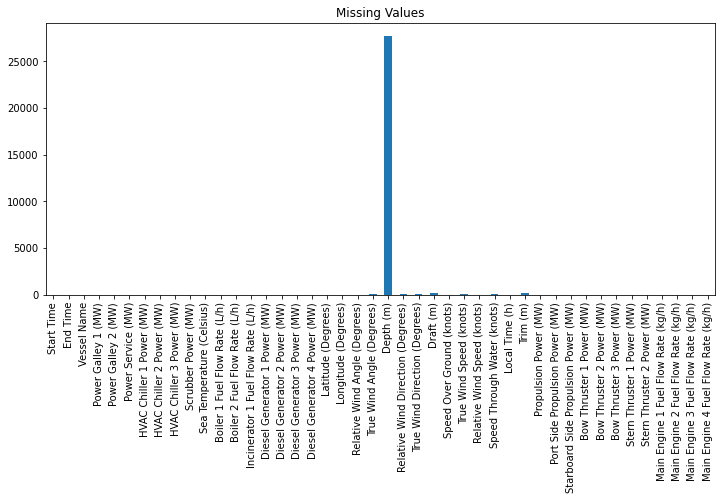

In [69]:
missing_values = dfv.isna().sum()
missing_values.plot(kind='bar',figsize=(12,5), title='Missing Values')  # Plot the missing values

In [85]:
# Correlation matrix
dfv_sub = dfv.iloc[:,3:]
corr = dfv_sub.corr()

In [97]:
high_corr = []
for i in corr.columns:
    high_corr.append(corr[(corr[i] > 0.8) | (corr[i] < -0.8)][i])

In [98]:
high_corr

[Power Galley 1 (MW)    1.0
 Name: Power Galley 1 (MW), dtype: float64,
 Power Galley 2 (MW)    1.0
 Name: Power Galley 2 (MW), dtype: float64,
 Power Service (MW)    1.0
 Name: Power Service (MW), dtype: float64,
 HVAC Chiller 1 Power (MW)    1.0
 Name: HVAC Chiller 1 Power (MW), dtype: float64,
 HVAC Chiller 2 Power (MW)    1.0
 Name: HVAC Chiller 2 Power (MW), dtype: float64,
 HVAC Chiller 3 Power (MW)    1.0
 Name: HVAC Chiller 3 Power (MW), dtype: float64,
 Scrubber Power (MW)                     1.000000
 Speed Over Ground (knots)               0.832713
 Speed Through Water (knots)             0.844160
 Propulsion Power (MW)                   0.850064
 Port Side Propulsion Power (MW)         0.847589
 Starboard Side Propulsion Power (MW)    0.850811
 Name: Scrubber Power (MW), dtype: float64,
 Sea Temperature (Celsius)    1.000000
 Latitude (Degrees)          -0.848092
 Name: Sea Temperature (Celsius), dtype: float64,
 Boiler 1 Fuel Flow Rate (L/h)    1.0
 Name: Boiler 1 Fuel Flo

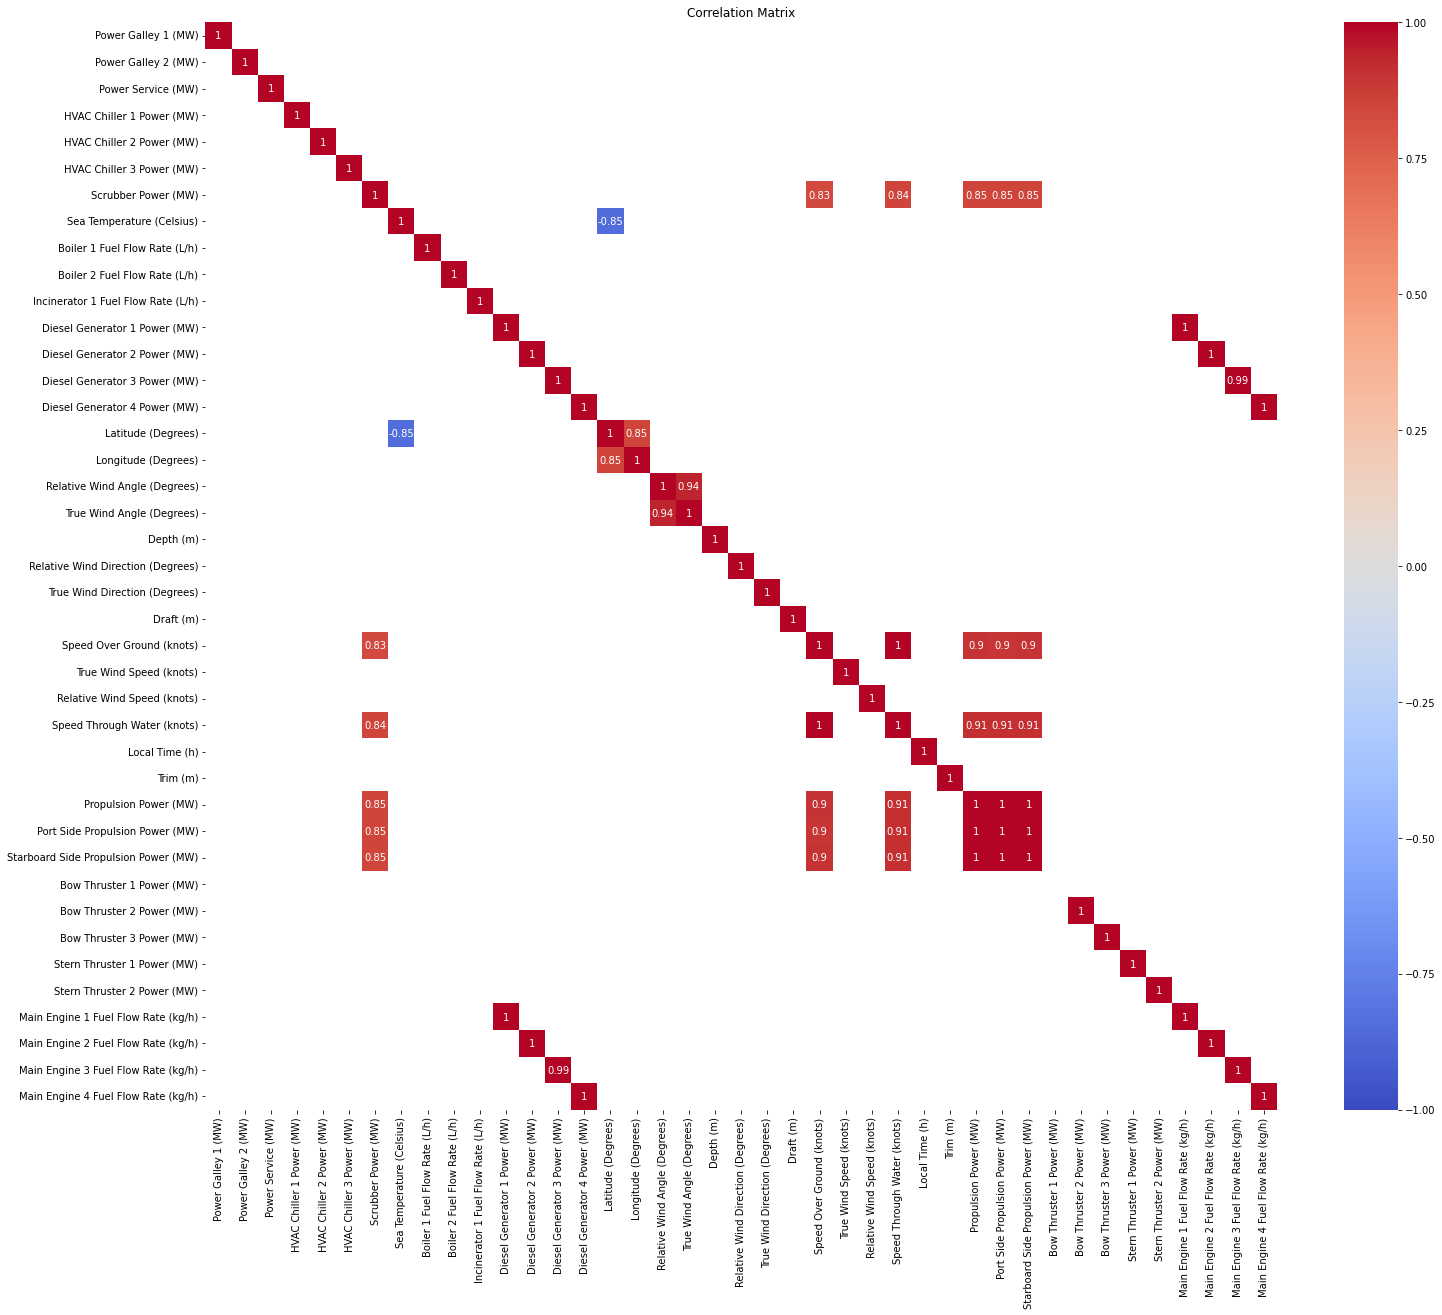

In [112]:
fig, ax = plt.subplots(figsize=(24,20))
sns.heatmap(data = corr[(corr > 0.8) | (corr < -0.8)], vmin=-1,vmax=1, cmap='coolwarm', ax = ax, annot= True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Correlation Matrix')
plt.show()

**Comments:**
1. Diesel Generators' Power are highly correlated to corresponding Main Engine's Fuel flow rate 
2. Propulsion power is a linear combination of Port Side Propulsion Power and Starboard Side Propulsion Power 
3. Speed through water and Speed over ground are positively correlated to the Propulsion Power
4. Sea water temperature reducing as the latitude is increasing completely makes sense. This is because, temperatures are lower as one moves towards the poles